<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_000_mnist/_008_2021_04_12_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 12, 12, 32)      

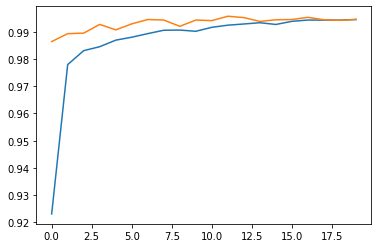

In [9]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import layers, models, utils, callbacks
# LOAD LIBRARIES
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Activation
import matplotlib.pyplot as plt

# tag::load data[]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# end::load data[]

# tag::one hot encoding[]
num_classes = len(np.unique(y_test))

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
# end::one hot encoding[]


# tag::scale x 0 or 1[]
# 0-255 -> 0.0 - 1.0
x_train, x_test = x_train / 255., x_test / 255.
# end::scale x 0 or 1[]

# tag::expand dimension[]
# 맨 마지막에 차원을 확장(추가)한다.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# data shape
data_shape = x_train.shape[1:]
# end::expand dimension[]

# tag::divide train data and eval data[]
# 검증 시 기계가 한 번도 보지 못한 데이터로 하기 위함
x_train, x_eval = x_train[:50000], x_train[50000:]
y_train, y_eval = y_train[:50000], y_train[50000:]
# end::divide train data and eval data[]


# tag::build model[]
model = models.Sequential()

model.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=3,))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size=3,))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')
# end::build model[]
print(model.summary())

# tag::train model[]
# 학습 시작
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    verbose=True,
                    validation_data=(x_test, y_test))


def visit_score(name, sc):
    print('{}: {:.4f}'.format(name, sc))


sc_loss, sc_accuracy = model.evaluate(x_eval, y_eval)
visit_score('loss', sc_loss)
visit_score('accuracy', sc_accuracy)
# end::train model[]

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
